Precision and recall for various callers with their default filters.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.dpi'] = 150
#matplotlib.rcParams['figure.figsize'] = [7, 5]
from IPython.display import set_matplotlib_formats
import attila_utils

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
%%bash
## Calculate precision--recall.
## Results are written to ~/projects/bsm/results/2019-03-22-prec-recall/chr22
#~/projects/bsm/notebook/2019-03-22-prec-recall/do-prec-recall

In [4]:
csvs = {t:'~/projects/bsm/results/2019-03-22-prec-recall/chr22/' + t + '/prec-recall.csv' for t in ['snp', 'indel']}
prs = {t: pd.read_csv('~/projects/bsm/results/2019-03-22-prec-recall/chr22/' + t + '/prec-recall.csv') for t in ['snp', 'indel']}
prs = {t: pd.concat([prs[t], pd.DataFrame({'vartype': [t] * len(prs[t].index)}, dtype='category')], axis=1) for t in prs.keys()}
prs = pd.concat(prs.values(), axis=0)
prs

,callset,path,C,V,CV,precision,recall,vartype
0,lofreqSomatic,/big/results/bsm/2019-03-22-prec-recall/chr22/...,4759,90436,4751,0.998319,0.052534,snp
1,somaticSniper,/big/results/bsm/2019-03-22-prec-recall/chr22/...,15609,90436,13824,0.885643,0.152859,snp
2,strelka2Germline2s,/big/results/bsm/2019-03-22-prec-recall/chr22/...,53790,90436,53439,0.993475,0.590904,snp
3,strelka2Somatic,/big/results/bsm/2019-03-22-prec-recall/chr22/...,21152,90436,20723,0.979718,0.229145,snp
4,Tnseq,/big/results/bsm/2019-03-22-prec-recall/chr22/...,16062,90436,15628,0.972980,0.172807,snp
0,strelka2Germline2s,/big/results/bsm/2019-03-22-prec-recall/chr22/...,15188,24821,12714,0.837108,0.512228,indel
1,strelka2Somatic,/big/results/bsm/2019-03-22-prec-recall/chr22/...,1597,24821,1560,0.976832,0.062850,indel
2,Tnseq,/big/results/bsm/2019-03-22-prec-recall/chr22/...,1252,24821,1106,0.883387,0.044559,indel


['named-figure/prec-recall-mix1-mix3.png',
 'named-figure/prec-recall-mix1-mix3.pdf']

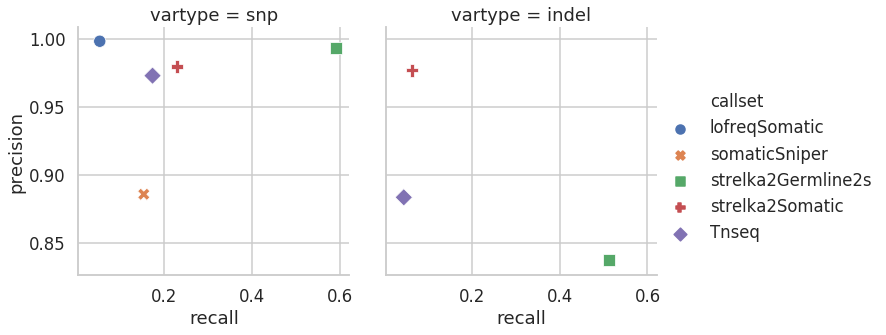

In [6]:
sns.set(style='whitegrid')
sns.set_context('talk')
g = sns.relplot(x='recall', y='precision', col='vartype', hue='callset', style='callset', s=150, data=prs)
attila_utils.savefig(g, 'prec-recall-mix1-mix3')

Comparing these left subplot (`vartype = snp`) to [Chaggai's results](https://www.synapse.org/#!Synapse:syn18463992) reveals some differences, which might be due to the following differences in calculating precision and recall:
1. My plot above is based on the complete truth set while Chaggai's on the subset that contains only those variants for which individual NA12892 is homozygous.  This is probably the most important difference.
1. For each CEPH/Utah grandparent I combined our germline callset with Illumina's by using union while Chaggai took the intersection.  Since the two sets overlap to a great extent, this doesn't seem to matter much.
1. My filtering/treatment for various minor classes of variants using `bcftools` is likely to show differences from Chaggai's custom scripts.